In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import seaborn as sns

In [127]:
data = {
    "Method": (["MedCLIP"] * 6 + ["BiomedCLIP"] * 6 + ["PLIP"] * 6 + ["CLIP"] * 6 + ["BLIP2"] * 6) * 3,
    "FT": ["ZS"] * 5 * 6 + ["LP"] * 30 + ["LoRA"] * 30,
    "Dataset": ["CheXpert", "GF3300", "PAPILA", "HAM10000", "FairVLMed", "Camelyon17"] * 15,
    "AUC": [
        48.27,
        46.27,
        50.51,
        54.11,
        54.23,
        76.40,
    ]
    + [72.50, 56.65, 78.33, 67.26, 54.33, 75.90]
    + [52.88, 38.66, 65.72, 57.73, 56.63, 74.5]
    + [
        54.05,
        70.64,
        78.25,
        72.05,
        60.19,
        53.00,
    ]
    + [
        63.65,
        42.75,
        69.11,
        44.36,
        43.83,
        51.8,
    ]
    + [
        89.77,
        76.48,
        80.14,
        80.85,
        72.45,
        93.38,
    ]
    + [
        83.60,
        80.34,
        60.05,
        85.80,
        71.32,
        98.43,
    ]
    + [53.18, 79.96, 80.14, 88.52, 71.54, 99.11]
    + [
        76.61,
        80.31,
        88.42,
        84.89,
        68.49,
        95.44,
    ]
    + [
        82.91,
        80.02,
        84.63,
        90.10,
        74.15,
        98.43,
    ]
    + [
        90.44,
        82.28,
        81.80,
        86.39,
        73.69,
        97.63,
    ]
    + [
        84.60,
        81.48,
        92.91,
        88.61,
        73.61,
        99.01,
    ]
    + [52.88, 84.71, 80.36, 86.88, 74.37, 99.91]
    + [
        85.72,
        84.22,
        95.74,
        89.24,
        74.63,
        99.86,
    ]
    + [
        86.55,
        83.08,
        91.13,
        89.18,
        77.84,
        99.94,
    ],
}

In [128]:
df_data = pd.DataFrame.from_dict(data)

df_data

,Method,FT,Dataset,AUC
0,MedCLIP,ZS,CheXpert,48.27
1,MedCLIP,ZS,GF3300,46.27
2,MedCLIP,ZS,PAPILA,50.51
3,MedCLIP,ZS,HAM10000,54.11
4,MedCLIP,ZS,FairVLMed,54.23
...,...,...,...,...
85,BLIP2,LoRA,GF3300,83.08
86,BLIP2,LoRA,PAPILA,91.13
87,BLIP2,LoRA,HAM10000,89.18
88,BLIP2,LoRA,FairVLMed,77.84


In [129]:
general_methods = ["CLIP", "BLIP2"]
medical_methods = ["MedCLIP", "BiomedCLIP", "PLIP"]


def get_RQ1_mat(df, dataset):
    df_general = df.loc[(df["Method"].isin(general_methods)) & (df["FT"] == "ZS") & (df["Dataset"] == dataset)]
    df_medical = df.loc[(df["Method"].isin(medical_methods)) & (df["FT"] == "ZS") & (df["Dataset"] == dataset)]

    # print(df_medical.loc[(df_medical["Method"] == "PLIP") & (df_medical["Dataset"] == "CheXpert")])

    df_medical.loc[(df_medical["Method"] == "PLIP") & (df_medical["Dataset"] == "CheXpert"), "AUC"] = np.inf
    df_medical.loc[(df_medical["Method"] == "MedCLIP") & (df_medical["Dataset"] == "Camelyon17"), "AUC"] = np.inf

    mat = []
    for auc_general in df_general["AUC"].tolist():
        row = []
        for auc_medical in df_medical["AUC"].tolist():
            delta = auc_medical - auc_general

            # if np.isinf(delta):
            #     delta = 0

            row.append(delta)

        mat.append(row)

    return mat


def get_RQ2_mat(df, dataset):
    df_general = df.loc[(df["Method"].isin(general_methods)) & (df["FT"] != "ZS") & (df["Dataset"] == dataset)]
    df_medical = df.loc[(df["Method"].isin(medical_methods)) & (df["FT"] == "ZS") & (df["Dataset"] == dataset)]

    # print(df_medical.loc[(df_medical["Method"] == "PLIP") & (df_medical["Dataset"] == "CheXpert")])

    df_medical.loc[(df_medical["Method"] == "PLIP") & (df_medical["Dataset"] == "CheXpert"), "AUC"] = np.inf
    df_medical.loc[(df_medical["Method"] == "MedCLIP") & (df_medical["Dataset"] == "Camelyon17"), "AUC"] = np.inf

    mat = []
    for auc_general in df_general["AUC"].tolist():
        row = []
        for auc_medical in df_medical["AUC"].tolist():
            delta = auc_medical - auc_general

            # if np.isinf(delta):
            #     delta = "Nan"

            row.append(delta)

        mat.append(row)

    return mat


def get_RQ3_mat(df, dataset):
    df_general = df.loc[(df["Method"].isin(general_methods)) & (df["FT"] != "ZS") & (df["Dataset"] == dataset)]
    df_medical = df.loc[(df["Method"].isin(medical_methods)) & (df["FT"] != "ZS") & (df["Dataset"] == dataset)]

    mat = []
    for auc_general in df_general["AUC"].tolist():
        row = []
        for auc_medical in df_medical["AUC"].tolist():
            delta = auc_medical - auc_general

            # if np.isinf(delta):
            #     delta = 0

            row.append(delta)

        mat.append(row)

    return mat


RQ_cxp = get_RQ1_mat(df_data, "CheXpert")

RQ_cxp

[[-5.779999999999994, 18.450000000000003, inf],
 [-15.379999999999995, 8.850000000000001, inf]]

In [172]:
import copy

plt.rcParams["font.serif"] = ["Calibri"]
plt.rcParams["font.size"] = 16


def plot_heatmap(data, name):
    cell_length = 0.9

    fig_width = cell_length * len(data[0])
    fig_height = cell_length * len(data)

    plt.figure(figsize=(fig_width, fig_height))

    # plt.imshow(RQ_cxp, vmin=-10, vmax=10, cmap="bwr", linewidths=1)

    annot = np.array(data).copy().astype(object)

    for i in range(annot.shape[0]):
        for j in range(annot.shape[1]):
            if annot[i, j] == np.inf:
                annot[i, j] = "─"
            else:
                annot[i, j] = "{:.1f}".format(float(annot[i, j]))
    # annot[annot == np.inf] = "NA"
    annot = annot.astype(str)

    data = np.array(data)
    data[~np.isfinite(data)] = 0

    maximum_value = 40

    sns.heatmap(
        data,
        linewidths=0,
        annot=annot,
        cbar=False,
        fmt="",
        cmap="vlag_r",
        vmin=-maximum_value,
        vmax=maximum_value,
        linecolor="black",
    )
    # plt.tight_layout()
    plt.axis("off")

    # plt.set_axis_off()
    plt.savefig(os.path.join("heatmaps", f"{name}.png"), bbox_inches="tight", pad_inches=0, dpi=300)

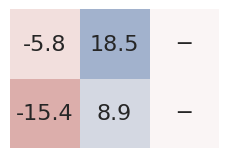

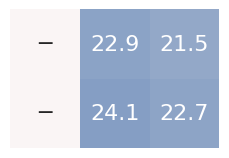

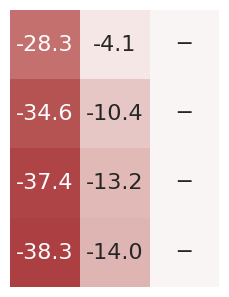

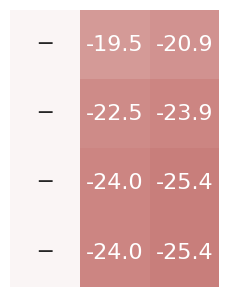

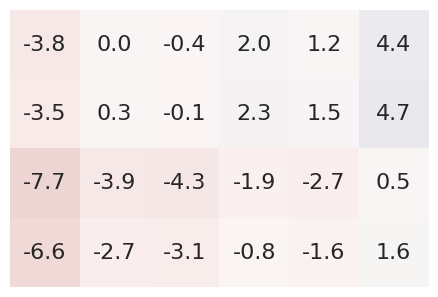

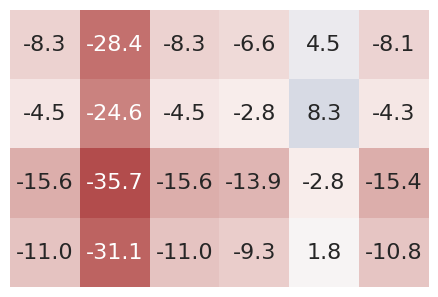

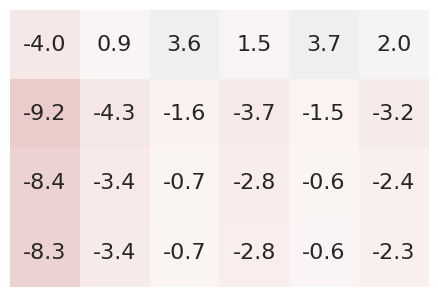

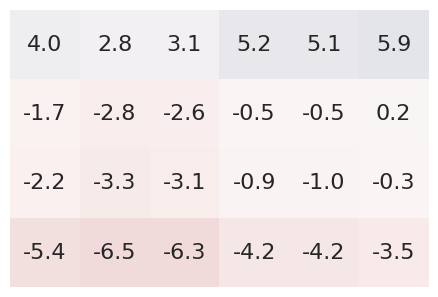

In [173]:
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerPatch

RQ1_datasets = ["CheXpert", "Camelyon17"]
RQ3_datasets = ["GF3300", "PAPILA", "HAM10000", "FairVLMed"]

for data in RQ1_datasets:
    plot_heatmap(get_RQ1_mat(df_data, data), f"RQ1_{data}")

for data in RQ1_datasets:
    plot_heatmap(get_RQ2_mat(df_data, data), f"RQ2_{data}")

for data in RQ3_datasets:
    plot_heatmap(get_RQ3_mat(df_data, data), f"RQ3_{data}")

In [88]:
get_RQ1_mat(df_data, "Camelyon17")

[[inf, 22.900000000000006, 21.5], [inf, 24.10000000000001, 22.700000000000003]]

In [190]:
data_vqa = {
    "Method": (["LLaVA"] * 4 + ["LLaVA-Med"] * 4) * 6,
    "FT": ["ZS"] * 4 * 2 + ["M"] * 8 + ["L"] * 8 + ["VM"] * 8 + ["ML"] * 8 + ["VML"] * 8,
    "Dataset": ["VQA-RAD", "SLAKE", "PathVQA", "FairVLMed10k"] * 2 * 6,
    "AUC": [
        49.685,
        60.08,
        40.1,
        44.92,
    ]
    + [
        55.855,
        55.87,
        44.845,
        56.31,
    ]
    + [
        56.715,
        78.755,
        64.24,
        67.54,
    ]
    + [
        63.675,
        81.135,
        63.765,
        68.45,
    ]
    + [
        59.39,
        82.3,
        68.745,
        71.55,
    ]
    + [
        64.76,
        83.705,
        70.89,
        71.945,
    ]
    + [
        58.165,
        83.295,
        67.625,
        69.63,
    ]
    + [
        64.135,
        82.035,
        66.265,
        68.995,
    ]
    + [
        59.965,
        84.035,
        69.585,
        71.55,
    ]
    + [
        63.825,
        85.365,
        71.915,
        72.145,
    ]
    + [
        60.875,
        85.68,
        71.05,
        71.08,
    ]
    + [
        66.12,
        85.67,
        72.65,
        71.385,
    ],
}

In [191]:
df_vqa = pd.DataFrame.from_dict(data_vqa)

df_vqa

,Method,FT,Dataset,AUC
0,LLaVA,ZS,VQA-RAD,49.685
1,LLaVA,ZS,SLAKE,60.080
2,LLaVA,ZS,PathVQA,40.100
3,LLaVA,ZS,FairVLMed10k,44.920
4,LLaVA-Med,ZS,VQA-RAD,55.855
5,LLaVA-Med,ZS,SLAKE,55.870
6,LLaVA-Med,ZS,PathVQA,44.845
7,LLaVA-Med,ZS,FairVLMed10k,56.310
8,LLaVA,M,VQA-RAD,56.715
9,LLaVA,M,SLAKE,78.755


In [192]:
general_methods = ["LLaVA"]
medical_methods = ["LLaVA-Med"]


def get_RQ1_mat(df, dataset):
    df_general = df.loc[(df["Method"].isin(general_methods)) & (
        df["FT"] == "ZS") & (df["Dataset"] == dataset)]
    df_medical = df.loc[(df["Method"].isin(medical_methods)) & (
        df["FT"] == "ZS") & (df["Dataset"] == dataset)]

    # print(df_medical.loc[(df_medical["Method"] == "PLIP") & (df_medical["Dataset"] == "CheXpert")])

    df_medical.loc[df_medical["Dataset"] == "FairVLMed10k", "AUC"] = np.inf

    mat = []
    for auc_general in df_general["AUC"].tolist():
        row = []
        for auc_medical in df_medical["AUC"].tolist():
            delta = auc_medical - auc_general

            # if np.isinf(delta):
            #     delta = 0

            row.append(delta)

        mat.append(row)

    return mat


def get_RQ2_mat(df, dataset):
    df_general = df.loc[(df["Method"].isin(general_methods)) & (
        df["FT"] != "ZS") & (df["Dataset"] == dataset)]
    df_medical = df.loc[(df["Method"].isin(medical_methods)) & (
        df["FT"] == "ZS") & (df["Dataset"] == dataset)]

    # print(df_medical.loc[(df_medical["Method"] == "PLIP") & (df_medical["Dataset"] == "CheXpert")])

    df_medical.loc[df_medical["Dataset"] == "FairVLMed10k", "AUC"] = np.inf

    mat = []
    for auc_general in df_general["AUC"].tolist():
        row = []
        for auc_medical in df_medical["AUC"].tolist():
            delta = auc_medical - auc_general

            # if np.isinf(delta):
            #     delta = "Nan"

            row.append(delta)

        mat.append(row)

    return mat


def get_RQ3_mat(df, dataset):
    df_general = df.loc[(df["Method"].isin(general_methods)) & (
        df["FT"] != "ZS") & (df["Dataset"] == dataset)]
    df_medical = df.loc[(df["Method"].isin(medical_methods)) & (
        df["FT"] != "ZS") & (df["Dataset"] == dataset)]

    mat = []
    for auc_general in df_general["AUC"].tolist():
        row = []
        for auc_medical in df_medical["AUC"].tolist():
            delta = auc_medical - auc_general

            # if np.isinf(delta):
            #     delta = 0

            row.append(delta)

        mat.append(row)

    return mat


RQ_cxp = get_RQ1_mat(df_vqa, "VQA-RAD")

RQ_cxp

[[6.169999999999995]]

In [193]:
import copy

plt.rcParams["font.serif"] = ["Calibri"]
plt.rcParams["font.size"] = 16


def plot_heatmap(data, name, cmap="vlag_r"):
    cell_length = 0.9

    fig_width = cell_length * len(data[0])
    fig_height = cell_length * len(data)

    plt.figure(figsize=(fig_width, fig_height))

    # plt.imshow(RQ_cxp, vmin=-10, vmax=10, cmap="bwr", linewidths=1)

    annot = np.array(data).copy().astype(object)

    for i in range(annot.shape[0]):
        for j in range(annot.shape[1]):
            if annot[i, j] == np.inf:
                annot[i, j] = "─"
            else:
                annot[i, j] = "{:.1f}".format(float(annot[i, j]))
    # annot[annot == np.inf] = "NA"
    annot = annot.astype(str)

    data = np.array(data)
    data[~np.isfinite(data)] = 0

    maximum_value = 40

    sns.heatmap(
        data,
        linewidths=0,
        annot=annot,
        cbar=False,
        fmt="",
        cmap=cmap,
        vmin=-maximum_value,
        vmax=maximum_value,
        linecolor="black",
    )
    # plt.tight_layout()
    plt.axis("off")

    # plt.set_axis_off()
    plt.savefig(os.path.join("heatmaps", f"{name}.png"), bbox_inches="tight", pad_inches=0, dpi=300)

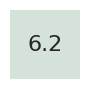

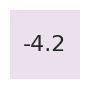

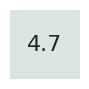

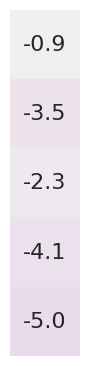

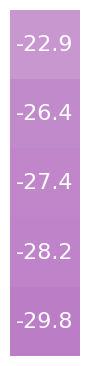

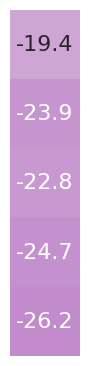

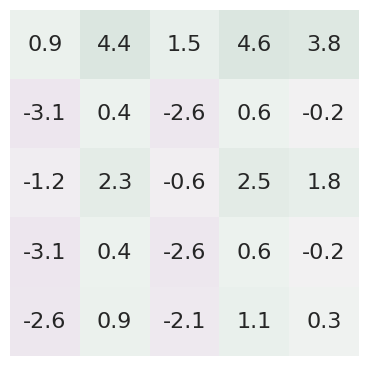

In [194]:
RQ1_datasets = ["VQA-RAD", "SLAKE", "PathVQA"]
RQ3_datasets = ["FairVLMed10k"]

cmap = sns.diverging_palette(300, 145, s=60, as_cmap=True)

for data in RQ1_datasets:
    plot_heatmap(get_RQ1_mat(df_vqa, data), f"vqa_RQ1_{data}", cmap)

for data in RQ1_datasets:
    plot_heatmap(get_RQ2_mat(df_vqa, data), f"vqa_RQ2_{data}", cmap)

for data in RQ3_datasets:
    plot_heatmap(get_RQ3_mat(df_vqa, data), f"vqa_RQ3_{data}", cmap)